# Moscow housing prediction

By Hauk Aleksander Olaussen, Charbel Badr and Noran Baskaran

## About the group

TODO

## Introduction

For this project we were tasked to create a machine learning algorithm that could predict house prices in Moscow based on features and known prices of the provided dataset. 

TODO

The following code will allow us to auto reload code when changes are made.

In [1]:
%load_ext autoreload

We begin with importing external and self made modules. Below you can see a description of the modules used:

- `numpy` is the defacto python package for numerical calculation. Most other numerical libraries (including pandas) is based on numpy.
- `pandas` is a widely used package for manipulating (mostly) tabular data
- `matplotlib` is the most used plotting library for python
- `seaborn` contains several convience functions for matplotlib and integrates very well with pandas
- `Visualizer` contains several functions used to plot different parts of the data and their correlation
- `Preprocessor` contains the main bulk of code used to preprocess and feature engineer the data provided to transform the data into something more understandable to a model
- `Model` contiains the model used for predicting the price of an apartment or house based on the data preprocessed by Preprocessor


In [130]:
%autoreload

# import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from Visualizer import Visualizer
from Preprocessor import Preprocessor
from Model import Model

sns.set_style('darkgrid')

## Describing the data

### Apartments

### Plotting some important features

As one can see below, there is a strong correlation between the total area of an apartment, and what the total price will be. This is of course not surprising, as size is often something that has a strong influence on what the price of an apartment (or house) will be. 

As the bulk of the data lies below in prices below `1 billion`, we have removed the three outliers <span style="color:red">(in red)</span> you can see in the first plot, to get a simpler visual view of how the area affects the total price in the second.

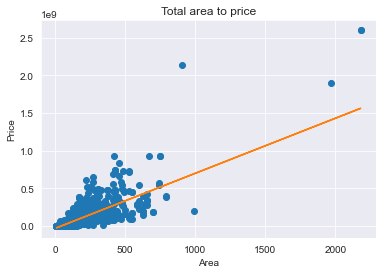

In [111]:
preprocessor = Preprocessor()
visualizer = Visualizer()
data = visualizer
m, b = visualizer.area_to_price(preprocessor.apartments)

We see that we do have a correlation between the two, but of course, not enough for an accurate prediction with this alone.

If we were to predict based on only this data alone - we could use the linear regression function found, which looks like this rounded to two decimals:

In [13]:
 "f(x) = %sx %s" % (round(m, 2), round(b, 2))

'f(x) = 731119.6x -30876411.05'

TODO Plot more features

### [1] Trying to predict lineraly based on only total area

Now lets try to predict what the housing prices will be using the some of the training data with just the total area as a feature.
This will be a linear prediction based on the following data, which are the first 1000 entries in the training set:

In [112]:
model = Model()
test_data = preprocessor.apartments[:1000]
test_data

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,bathrooms_shared,bathrooms_private,windows_court,windows_street,balconies,loggias,condition,phones,building_id
0,0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,0.0,2.0,0.0,1.0,NaN,NaN,NaN,1.0,4076
1,1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,2.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1893
2,2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,0.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,5176
3,3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1893
4,4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,6604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,NaN,7600000.0,33.0,NaN,NaN,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4783
996,996,NaN,7626710.0,49.0,NaN,NaN,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3351
997,997,NaN,7600000.0,33.0,NaN,NaN,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4878
998,998,NaN,7700000.0,31.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6012


Below we can see the apartment id and its price prediction based on this linear prediction. 

In [113]:
pred = model.predict_linearly(m, b, test_data)
pred

,id,price
0,0,1.240587e+07
1,1,3.346211e+07
2,2,2.651648e+07
3,3,3.346211e+07
4,4,2.615092e+07
...,...,...
995,995,0.000000e+00
996,996,4.948449e+06
997,997,0.000000e+00
998,998,0.000000e+00


Surprise, surprise - it is __really__ bad! <br>
It has a RMSLE of 8.19, which is __very__ high for this dataset - meaning that this way of predicting prices will not perform well enough!
To be fair - this is not machine learning, as all we do it feeding the linear function an input `total area`, and it will spit out some number `predicted price`. 
This is just pure math with no manipulation or anything - and will rarely be satisfactory when we have data of this magnitude of complexity.

In [114]:
error = model.root_mean_squared_log_error(test_data["price"], pred["price"])
error

8.190827280658308

## [2] How did we manipulate and feature engineer the data to optimize our algorithm?

TODO Explain this (we have littelary not done anytuhWe all understood that we need to the other features into consideration as well. We will discuss how we manipulated and feature engineered the data in the next section.

In [131]:
labels = preprocessor.apartments["price"]
training_data = preprocessor.preprocessed_apartments()
test_data = preprocessor.preprocessed_apartments(test_set = True)
model.fit(training_data, labels)
pred = model.predict(test_data)
model.save_predictions(pred)

,id,price_prediction
0,23285,3.759493e+07
1,23286,3.306972e+07
2,23287,8.832865e+06
3,23288,2.074042e+07
4,23289,2.573100e+06
...,...,...
9932,33217,3.306800e+07
9933,33218,3.351075e+07
9934,33219,2.104622e+07
9935,33220,4.726584e+06


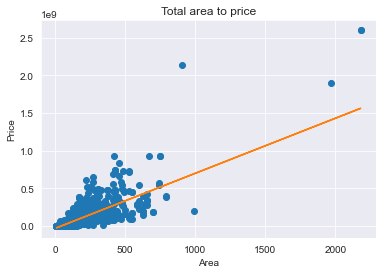

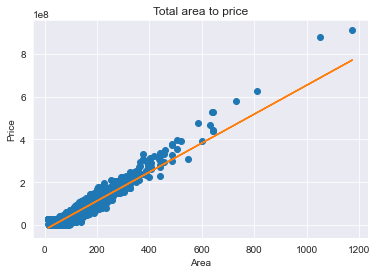

0.7267578706550315

In [132]:
visualizer.area_to_price(preprocessor.apartments)
data = [(preprocessor.apartments_test["area_total"][i], pred[i]) for i in range(len(pred))]
data = pd.DataFrame(data, columns = ["area_total", "price"])
visualizer.area_to_price(data)
model.score

### Buildings

TODO